In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

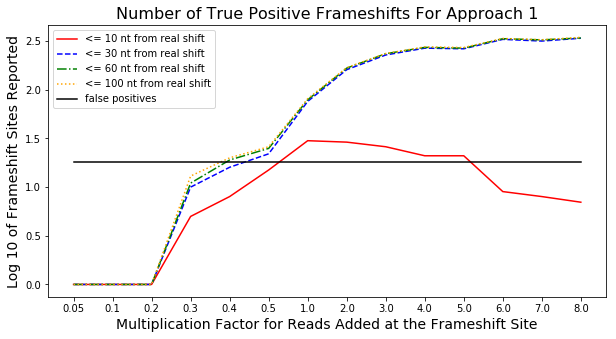

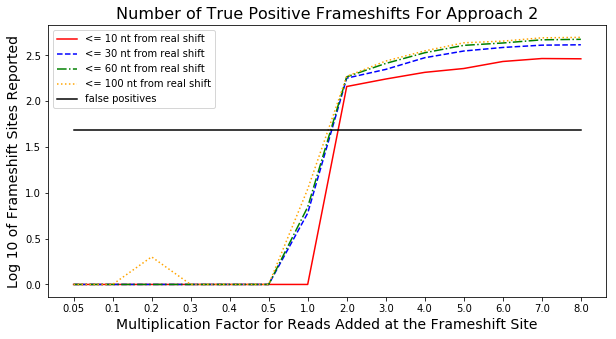

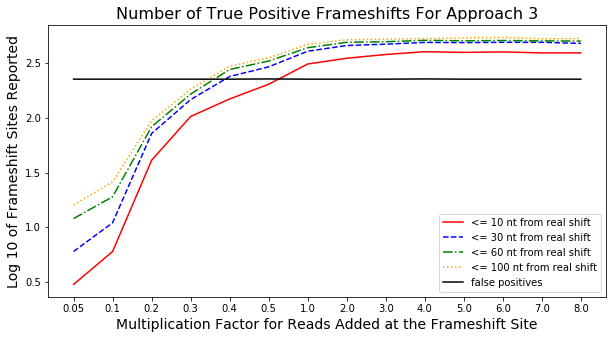

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import subplot
import numpy as np
import math

shift_info_dict = dict()
shift_true_positives = dict()
shift_false_positives = dict()
levels = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
approaches = [1, 2, 3]

distances = [10, 30, 60, 100]
legend_labels = []
for dist in distances:
    legend_labels.append("<= " + str(dist) + " nt from real shift")
legend_labels.append("false positives")
    
for approach in approaches:    
    for level in levels:   
        infoFile = open("output/all_jan2014_25_to_32_starts_simulated_shifts_info_at_" + str(level), "r")
        shift_info_dict[level] = dict()
        for line in infoFile:
            cs = line.strip().split(",")
            gene = cs[0]
            shift_start = int(cs[1])
            shift_end = int(cs[2])
            direction = int(cs[3])
            percent = float(cs[4])
            #if (percent == '0.9'):
            shift_info_dict[level][gene] = dict()
            shift_info_dict[level][gene]["shift_start"] = shift_start
            shift_info_dict[level][gene]["shift_end"] = shift_end
            shift_info_dict[level][gene]["direction"] = direction
            shift_info_dict[level][gene]["percent"] = percent

        inFile = open("output/all_jan2014_25_to_32_starts_with_simulated_shifts_at_" + str(level) + "_with_found_frameshifts_approach_" + str(approach), "r")
        shift_true_positives[level] = dict()
        shift_false_positives[level] = 0

        for dist in distances:
            shift_true_positives[level][dist] = 0

        for line in inFile:
            Info_string = line.strip()
            letters = inFile.readline().rstrip("\n").split(" ")
            reads_1 = inFile.readline().rstrip("\n").split(" ")
            reads_2 = inFile.readline().rstrip("\n").split(" ")
            percents = inFile.readline().rstrip("\n").split(",")
            percents = [float(x) for x in percents]
            blank = inFile.readline()
            gene_name = Info_string.split("\t")[0].split(" ")[1]
            p_value  = float(Info_string.split("\t")[1].split(" ")[1])

            if (gene_name in shift_info_dict[level]):
                detected_shift = int(Info_string.split("\t")[3].split(" ")[1])
                detected_shift_end = detected_shift + int(Info_string.split("\t")[4].split(" ")[1])

                real_shift = shift_info_dict[level][gene_name]["shift_start"]
                real_shift_end = shift_info_dict[level][gene_name]["shift_end"]

                for dist in distances:
                    if (abs(detected_shift-real_shift) <= dist and abs(detected_shift_end-real_shift_end) <= dist):
                        shift_true_positives[level][dist] += 1
            else:
                shift_false_positives[level] += 1

    inFile.close()
    import matplotlib.pyplot as plt
    plt.figure(approach, figsize=(10, 5))
    colors = ["red", "blue" , "green", "orange", "black"]
    linestyles = ['-', '--', '-.', ':', '-']
    n = 0
    xs = levels
    for dist in distances:
        ys = []
        for x in xs:
            y = shift_true_positives[x][dist]
            if (y != 0):
                ys.append(math.log(y, 10))
            else:
                ys.append(0)
        plt.plot(np.arange(len(xs)), ys, c=colors[n],linestyle=linestyles[n])
        n += 1
    ys = []
    for x in xs:
        y = shift_false_positives[x]
        if (y != 0):
            ys.append(math.log(y, 10))
        else:
            ys.append(0)
    plt.plot(np.arange(len(xs)), ys, c=colors[n],linestyle=linestyles[n])
    plt.title('Number of True Positive Frameshifts For Approach '+ str(approach),fontsize=16)
    plt.xlabel('Multiplication Factor for Reads Added at the Frameshift Site',fontsize=14)
    plt.xticks(np.arange(len(xs)), xs)
    plt.ylabel('Log 10 of Frameshift Sites Reported',fontsize=14)
    plt.legend(legend_labels)